In [3]:
import pandas as pd
dataAds = pd.read_csv("https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/ads/Advertising.csv")

In [4]:
dataAds.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
import numpy as np
dataAds["corr1"] = (dataAds["TV"]-np.mean(dataAds["TV"])) * (dataAds["Sales"]-np.mean(dataAds["Sales"]))

In [ ]:
dataAds["corr2"] = (dataAds["TV"]-np.mean(dataAds["TV"]))**2

In [13]:
dataAds["corr3"] = (dataAds["Sales"]-np.mean(dataAds["Sales"]))**2

In [14]:
dataAds.head()

,TV,Radio,Newspaper,Sales,corr1,corr2,corr3
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [15]:
corrPirson = sum(dataAds["corr1"]) / np.sqrt(sum(dataAds["corr2"]) * sum(dataAds["corr3"]))

In [16]:
corrPirson


0.782224424861606

In [23]:
def corrCoef(df, v1, v2):
    df["corr1"] = (df[v1]-np.mean(df[v1])) * (df["Sales"]-np.mean(df["Sales"]))    
    df["corr2"] = (df[v1]-np.mean(df[v1]))**2 
    df["corr3"] = (df[v2]-np.mean(df[v2]))**2
    corrPirson = sum(df["corr1"]) / np.sqrt(sum(df["corr2"]) * sum(df["corr3"]))
    return (corrPirson)

In [26]:
cols = dataAds.columns.values

In [28]:
for x in cols:
    for y in cols:
        print(x + ", "+ y + ": " + str(corrCoef(dataAds,x,y)))

TV, TV: 0.04753664043301969
TV, Radio: 0.2748888271497582
TV, Newspaper: 0.18739579478486862
TV, Sales: 0.782224424861606
TV, corr1: 0.009228747634105167
TV, corr2: 0.0006308932218630238
TV, corr3: 8.779172188491027e-08
Radio, TV: 0.03501768094446727
Radio, Radio: 0.20249578339243968
Radio, Newspaper: 0.13804438202480146
Radio, Sales: 0.5762225745710553
Radio, corr1: 0.03818095381350961
Radio, corr2: 0.015883677082042275
Radio, corr3: 7.234641180959596e-05
Newspaper, TV: 0.013873983454265468
Newspaper, Radio: 0.08022870368830397
Newspaper, Newspaper: 0.054693098472273306
Newspaper, Sales: 0.22829902637616525
Newspaper, corr1: 0.009684003790211018
Newspaper, corr2: 0.0015603052897250422
Newspaper, corr3: 3.5264622215151464e-07
Sales, TV: 0.06077110215706962
Sales, Radio: 0.3514193860648017
Sales, Newspaper: 0.23956781305828356
Sales, Sales: 1.0
Sales, corr1: 0.15327877926219324
Sales, corr2: 0.15327877926219324
Sales, corr3: 0.0019478689720089481
corr1, TV: 0.0020879878806837194
corr1, 

Text(0.5, 1.0, 'TV vs Sales from the product')

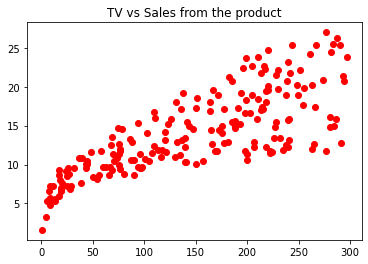

In [31]:
import matplotlib.pyplot as plt
plt.plot(dataAds["TV"], dataAds["Sales"], "ro")
plt.title("TV vs Sales from the product")

In [32]:
dataAds.corr()

,TV,Radio,Newspaper,Sales,corr1,corr2,corr3
TV,1.000000,0.054809,0.056648,0.782224,0.135238,0.077558,0.077558
Radio,0.054809,1.000000,0.354104,0.576223,0.068532,0.139773,0.139773
Newspaper,0.056648,0.354104,1.000000,0.228299,0.073069,0.021055,0.021055
Sales,0.782224,0.576223,0.228299,1.000000,0.217918,0.134265,0.134265
corr1,0.135238,0.068532,0.073069,0.217918,1.000000,0.769609,0.769609
corr2,0.077558,0.139773,0.021055,0.134265,0.769609,1.000000,1.000000
corr3,0.077558,0.139773,0.021055,0.134265,0.769609,1.000000,1.000000


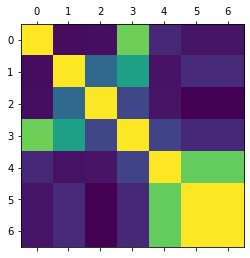

In [33]:
plt.matshow(dataAds.corr())